第29回 glob関数

In [3]:
# glob関数 パターンマッチしたファイルパスのリストをつくる → 大量のファイル操作でよく使う
from glob import glob
glob('gaussian_filtered_images/Mild/*')　# *:0文字以上のあらゆる文字列がマッチする

['gaussian_filtered_images/Mild/2d7666b8884f.png',
 'gaussian_filtered_images/Mild/50840c36f0b4.png',
 'gaussian_filtered_images/Mild/30cab14951ac.png',
 'gaussian_filtered_images/Mild/a8582e346df0.png',
 'gaussian_filtered_images/Mild/cab3dfa7962d.png',
 'gaussian_filtered_images/Mild/35d6c4c50072.png',
 'gaussian_filtered_images/Mild/67f5d89da548.png',
 'gaussian_filtered_images/Mild/6b07971c3bf6.png',
 'gaussian_filtered_images/Mild/7116128c65ab.png',
 'gaussian_filtered_images/Mild/e38f3a65b02b.png',
 'gaussian_filtered_images/Mild/d85588ff2ebd.png',
 'gaussian_filtered_images/Mild/a19ecd0a706e.png',
 'gaussian_filtered_images/Mild/49c5e7f6b8d2.png',
 'gaussian_filtered_images/Mild/2f2e1949ad56.png',
 'gaussian_filtered_images/Mild/35aa7f5c2ec0.png',
 'gaussian_filtered_images/Mild/55eac26bd383.png',
 'gaussian_filtered_images/Mild/af133a85ea0c.png',
 'gaussian_filtered_images/Mild/80a02014b418.png',
 'gaussian_filtered_images/Mild/384631079d1e.png',
 'gaussian_filtered_images/Mild

In [4]:
# ファイル名の最後が数字のみ
glob('gaussian_filtered_images/Mild/*[0-9].png')　# 任意文字＊と末尾のみ0-9指定の正規表現

['gaussian_filtered_images/Mild/50840c36f0b4.png',
 'gaussian_filtered_images/Mild/a8582e346df0.png',
 'gaussian_filtered_images/Mild/35d6c4c50072.png',
 'gaussian_filtered_images/Mild/67f5d89da548.png',
 'gaussian_filtered_images/Mild/6b07971c3bf6.png',
 'gaussian_filtered_images/Mild/49c5e7f6b8d2.png',
 'gaussian_filtered_images/Mild/2f2e1949ad56.png',
 'gaussian_filtered_images/Mild/35aa7f5c2ec0.png',
 'gaussian_filtered_images/Mild/55eac26bd383.png',
 'gaussian_filtered_images/Mild/80a02014b418.png',
 'gaussian_filtered_images/Mild/e25ccfe38e44.png',
 'gaussian_filtered_images/Mild/1e8a1fdee5b9.png',
 'gaussian_filtered_images/Mild/c102db7634d8.png',
 'gaussian_filtered_images/Mild/1b329a127307.png',
 'gaussian_filtered_images/Mild/58184d6fd087.png',
 'gaussian_filtered_images/Mild/25e9fd872182.png',
 'gaussian_filtered_images/Mild/c4a8f2fcf6e8.png',
 'gaussian_filtered_images/Mild/ee78ce914066.png',
 'gaussian_filtered_images/Mild/e9ff9352ccb3.png',
 'gaussian_filtered_images/Mild

In [7]:
# 実用例:globでファイルパスリストからDataFrame作成
import numpy as np

# フォルダ内全体のpngのリスト
all_png_list = glob('gaussian_filtered_images/*/*.png')

# gaussisn~/以下のフォルダ名のリスト作成
type_list = [p.split('/')[1] for p in all_png_list]

# フォルダ名取れているか確認
print(np.unique(type_list))

#同様の拡張子のリストを作成
extension_list = [p.split('.')[-1] for p in all_png_list]

# 拡張子取れているか確認
# print(np.unique(extension_list))
print(np.unique(extension_list))

['Mild' 'Moderate' 'No_DR' 'Proliferate_DR' 'Severe']
['png']


unique: setに似たやつ 重複させない

In [8]:
# DataFrame
import pandas as pd
df = pd.DataFrame({'filepath': all_png_list, 'type': type_list, 'extension': extension_list})
df.head()

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,filepath,type,extension
0,gaussian_filtered_images/Mild/2d7666b8884f.png,Mild,png
1,gaussian_filtered_images/Mild/50840c36f0b4.png,Mild,png
2,gaussian_filtered_images/Mild/30cab14951ac.png,Mild,png
3,gaussian_filtered_images/Mild/a8582e346df0.png,Mild,png
4,gaussian_filtered_images/Mild/cab3dfa7962d.png,Mild,png


★この一連の流れ，データサイエンスではめちゃくちゃ頻出！

In [10]:
# folder別file数確認
df['type'].value_counts()

No_DR             1805
Moderate           999
Mild               370
Proliferate_DR     295
Severe             193
Name: type, dtype: int64

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


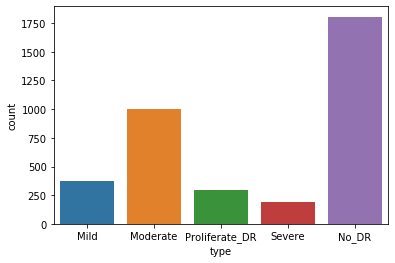

In [11]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='type', data=df)

numpyのバージョンが1.15.0になってから出てくるようになったエラーらしい

numpyオンリーで使うときは問題ないが、pandasやtensorflow、scikit-learnなどを一緒に使うと出てくるエラーっぽい